### Student Information
Name: 黃子軍

Student ID: 110062143

GitHub ID: zijun0502

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

In [128]:
import sys
import os
# Add the 'helpers' directory to the Python path
notebook_dir = os.path.dirname(os.getcwd())
sys.path.append(notebook_dir)
import helpers.data_mining_helpers as dmh
import pandas as pd
import numpy as np

In [129]:
### Begin Assignment Here
%load_ext autoreload
%autoreload 2
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)
# my functions
# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Part 1

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [130]:
#Answer here
#Boolean access
fd = X[X['category'] == 1]
print(fd[:10])

print('-----------------')
#Attribute access
print(X.category)
print('-----------------')
#isin
print(X.isin([1,2,3][:10]))

                                                 text  category  category_name
0   From: sd345@city.ac.uk (Michael Collier) Subje...         1  comp.graphics
1   From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1  comp.graphics
11  From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1  comp.graphics
14  From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...         1  comp.graphics
15  From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...         1  comp.graphics
23  From: d91-hes@tekn.hj.se (STEFAN HERMANSSON) S...         1  comp.graphics
24  From: mjw19@cl.cam.ac.uk (M.J. Williams) Subje...         1  comp.graphics
25  From: dstampe@psych.toronto.edu (Dave Stampe) ...         1  comp.graphics
39  From: g9134255@wampyr.cc.uow.edu.au (Coronado ...         1  comp.graphics
42  From: gwang@magnus.acs.ohio-state.edu (Ge Wang...         1  comp.graphics
-----------------
0       1
1       1
2       3
3       3
4       3
       ..
2252    2
2253    2
2254    2
2255    2
2256    2
Nam

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [131]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [132]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [133]:
# Answer here

# isnull() document says: 
# Characters such as empty strings '' or numpy.inf 
# are not considered NA values 
# (unless you set pandas.options.mode.use_inf_as_na = True)

**My answer**:
Some characters and values will not be seen as a null value
in the method isnull() that pandas provide.
So in the above case, 
the string 'NaN' and 'None' is not recognized as null expectedly

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [134]:
X_sample = X.sample(n=1000,random_state=42) #random state

In [135]:
# Answer here
X[0:5]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian

In [136]:
X_sample[0:5]

text  category  \
561   From: ray@engr.LaTech.edu (Bill Ray) Subject: ...         2   
440   From: jkellett@netcom.com (Joe Kellett) Subjec...         3   
1513  From: noring@netcom.com (Jon Noring) Subject: ...         2   
1360  From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...         3   
259   From: keith@cco.caltech.edu (Keith Allan Schne...         0   

               category_name  
561                  sci.med  
440   soc.religion.christian  
1513                 sci.med  
1360  soc.religion.christian  
259              alt.atheism

**My answer**: 
1. The order of the record has been randomized.
2. The size of the dataframe is shrinked to 1000

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

277
category_name
sci.med                   277
soc.religion.christian    270
comp.graphics             247
alt.atheism               206
Name: count, dtype: int64


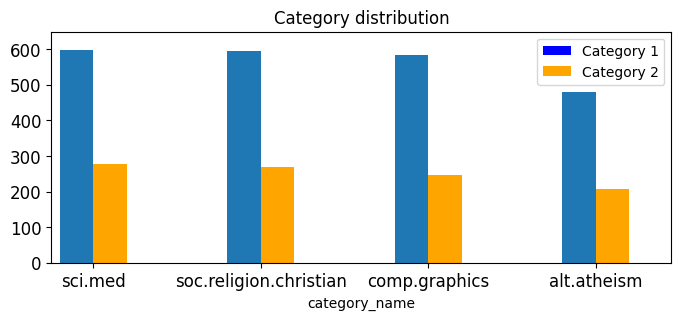

In [137]:
# Answer here
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
# plot barchart for X_sample
fig, ax = plt.subplots()
print(max(X_sample.category_name.value_counts()))
upper_bound = max(X_sample.category_name.value_counts() + 50) #277 + 50
upper_bound = max(X.category_name.value_counts() + 50) #277 + 50
print(X_sample.category_name.value_counts())
X.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3),
                                           label = 'category 1', position = 1, width = 0.2)
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3),
                                           label = 'category 2', color = 'orange',
                                           position = 0, width = 0.2)
# Combine two bars
legend_elements = [
    Patch(facecolor='blue', label='Category 1'),
    Patch(facecolor='orange', label='Category 2')
]
ax.legend(handles=legend_elements)

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [138]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

In [139]:
# Answer here
# Access the indices that has element equals to one

# Get the row slice for the specified range of columns
row_slice = X_counts[4, 0:100]

# Find the column indices where the values are 1
indices = row_slice.indices

# Get the corresponding terms from the vocabulary
vocabulary = count_vect.get_feature_names_out()
terms = [vocabulary[i] for i in indices]


count_vect.get_feature_names_out()[indices[1]]

'01'

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

term_00  term_000  term_008561  term_01  term_0100  term_013657  \
doc_0          0         0            0        0          0            0   
doc_4          1         0            0        1          0            0   
doc_5          1         0            0        0          0            0   
doc_6          0         0            0        1          0            0   
doc_10         0         0            0        0          0            0   
doc_11         0         0            0        0          0            0   
doc_21         0         0            0        0          0            1   
doc_22         0         0            0        0          0            0   
doc_24         0         0            0        0          0            0   
doc_28         0         0            0        0          0            0   
doc_31         0         0            0        0          0            0   
doc_33         0         0            0        1          0            0   
doc_38         0         0            0        0          0            0   
doc_46         0         0            0        0          0            0   
doc_53         0         0            0        1          0            0   
doc_56         0         0            1        0          0            0   
doc_64         0         0            0        0          0            0   
doc_66         0         0            0        0          0            0   
doc_82         0         0            0        0          0            0   
doc_83         0         0            0        0          0            0   
doc_97         0         1            0        0          0            0   
doc_100        0         0            0        1          0            0   
doc_101        0         0            0        0          0            0   
doc_104        0         0            0        0          0            0   
doc_106        1         0            0        0          0            0   
doc_107        0         0            0        0          0            0   
doc_110        0         0            0        1          0            0   
doc_123        0         4            0        1          0            0   
doc_127        0         0            0        0          0            0   
doc_131        0         0            0        0          0            0   
doc_142        2         0            0        0          0            0   
doc_147        0         0            0        0          0            0   
doc_150        0         0            0        1          0            0   
doc_151        0         0            0        0          0            0   
doc_157        0         0            0        0          0            0   
doc_162        0         0            0        0          0            0   
doc_166        0         0            0        0          0            0   
doc_173        0         0            0        0          0            0   
doc_183        0         0            0        0          0            0   
doc_188        0         0            0        0          1            0   
doc_197        1         0            0        0          0            0   
doc_199        1         0            0        0          0            0   

         term_02  term_020  term_0200  term_02115  ...  term_0358  term_04  \
doc_0          0         0          0           0  ...          0        0   
doc_4          0         0          0           0  ...          0        0   
doc_5          0         0          0           0  ...          0        0   
doc_6          0         0          0           0  ...          0        0   
doc_10         0         0          0           0  ...          0        0   
doc_11         0         0          0           0  ...          0        0   
doc_21         0         0          0           0  ...          0        0   
doc_22         1         0          0           0  ...          0        0   
doc_24         0         0          0 

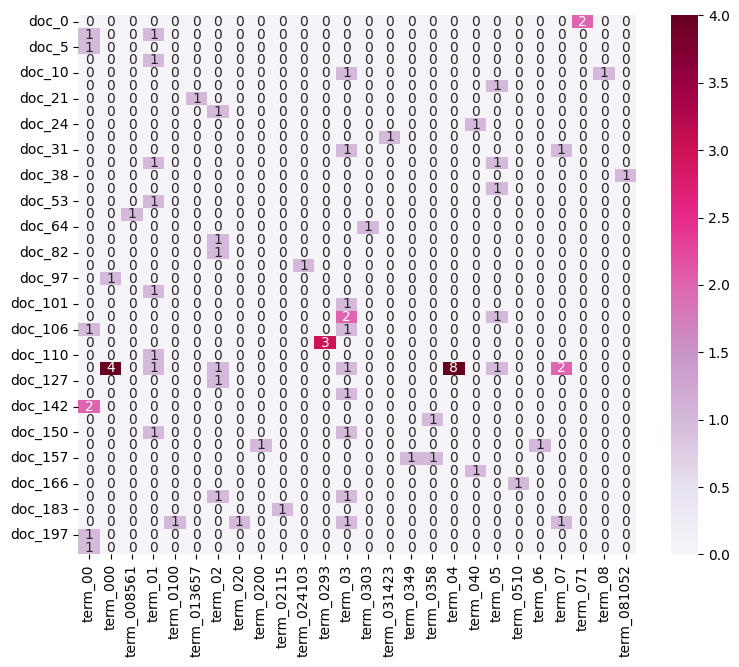

In [140]:
# Answer here
import seaborn as sns

plot_z = X_counts[0:200, 0:200].toarray()

# Find the indices of non-zero elements in plot_z
non_zero_rows, non_zero_cols = np.nonzero(plot_z)
non_zero_cols = np.unique(non_zero_cols)
non_zero_rows = np.unique(non_zero_rows)

plot_x = ["term_" + str(i) for i in count_vect.get_feature_names_out()[0:200]]
plot_y = ["doc_" + str(i) for i in list(X.index)[0:200]]

# Select the labels for the columns and rows that have non-zero values
selected_x = [plot_x[col] for col in non_zero_cols]
selected_y = [plot_y[row] for row in non_zero_rows]
selected_z = plot_z[non_zero_rows][:, non_zero_cols]

df_todraw = pd.DataFrame(selected_z, columns=selected_x, index=selected_y)
display(df_todraw)

# Create a heatmap using seaborn
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=4, annot=True)


### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

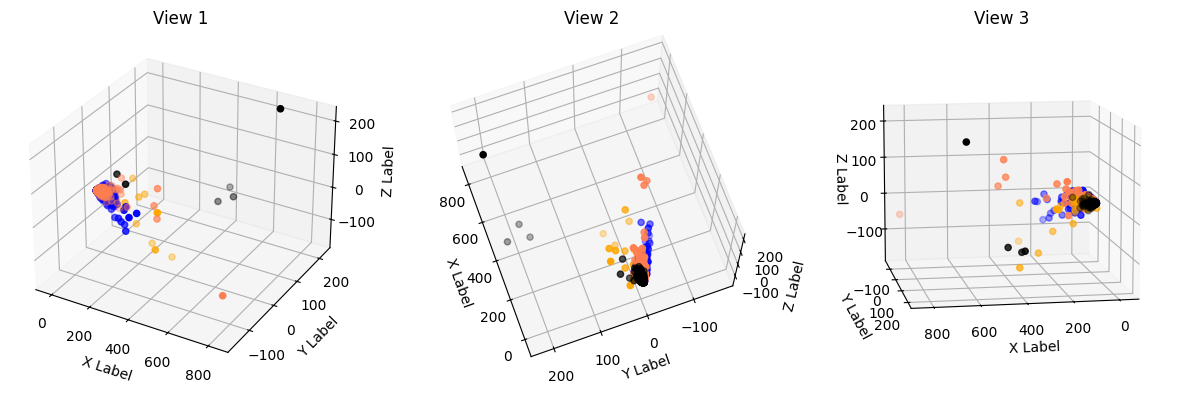

In [141]:
# Answer here
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

from mpl_toolkits.mplot3d import Axes3D  # Import 3D plotting tools

col = ['coral', 'blue', 'black', 'orange']

# Create a 3D plot with three different camera angles
fig = plt.figure(figsize=(15, 5))

# First subplot
ax1 = fig.add_subplot(131, projection='3d')
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax1.scatter(xs, ys, zs, c=c, marker='o')
ax1.set_title('View 1')
ax1.set_xlabel('X Label')
ax1.set_ylabel('Y Label')
ax1.set_zlabel('Z Label')

# Second subplot
ax2 = fig.add_subplot(132, projection='3d')
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax2.scatter(xs, ys, zs, c=c, marker='o')
ax2.view_init(elev=70, azim=160)  # Adjust the view angle
ax2.set_title('View 2')
ax2.set_xlabel('X Label')
ax2.set_ylabel('Y Label')
ax2.set_zlabel('Z Label')

# Third subplot
ax3 = fig.add_subplot(133, projection='3d')
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax3.scatter(xs, ys, zs, c=c, marker='o')
ax3.view_init(elev=10, azim=80)  # Adjust the view angle
ax3.set_title('View 3')
ax3.set_xlabel('X Label')
ax3.set_ylabel('Y Label')
ax3.set_zlabel('Z Label')

plt.show()


### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [142]:
term_frequencies = []
print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

35788


In [143]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [144]:
# Answer here
import plotly.express as px
import pandas as pd

# Create a dictionary with 'Terms' and 'Term Frequencies' data
data = {'Terms': count_vect.get_feature_names_out()[:300], 'Term Frequencies': term_frequencies[:300]}

df = pd.DataFrame(data)

# Create a bar chart using Plotly Express
fig = px.bar(df, x='Terms', y='Term Frequencies', labels={'Term Frequencies': 'Term Frequencies'})

# Rotate x-axis labels for better visibility
fig.update_xaxes(tickangle=90)

# Show the plot
fig.show()


### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [145]:
# Answer here
# Read the number of terms to display from user input
display_size = int(input("The size of the data to display"))

# Create a dictionary with 'Terms' and 'Term Frequencies' data for the specified number of terms
data = {'Terms': count_vect.get_feature_names_out()[:display_size], 'Term Frequencies': term_frequencies[:display_size]}

# Create a Pandas DataFrame from the data
df = pd.DataFrame(data)

# Create a bar chart using Plotly Express
fig = px.bar(df, x='Terms', y='Term Frequencies', labels={'Term Frequencies': 'Term Frequencies'})

# Rotate x-axis labels for better visibility
fig.update_xaxes(tickangle=90)

# Show the plot
fig.show()


### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [146]:
# Answer here
data = {'Terms': count_vect.get_feature_names_out()[:300], 'Term Frequencies': term_frequencies[:300]}
df = pd.DataFrame(data)

# Sort the data in descending order of term frequencies
df = df.sort_values(by='Term Frequencies', ascending=False)

fig = px.bar(df, x='Terms', y='Term Frequencies', labels={'Term Frequencies': 'Term Frequencies'})
fig.update_xaxes(tickangle=90)  # Rotate x-axis labels for better visibility

fig.show()

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [147]:
# Answer here
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)

X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name bin_category_name  
0           comp.graphics      [0, 1, 0, 0]  
1           comp.graphics      [0, 1, 0, 0]  
2  soc.religion.christian      [0, 0, 0, 1]  
3  soc.religion.christian      [0, 0, 0, 1]  
4  soc.religion.christian      [0, 0, 0, 1]  
5  soc.religion.christian      [0, 0, 0, 1]  
6  soc.religion.christian      [0, 0, 0, 1]  
7                 sci.med      [0, 0, 1, 0]  
8                 sci.med      [0, 0, 1, 0]

---

# Part 2

### 1. Data Preparation

In [148]:
# Initialize an empty string to store the concatenated data
input_data = ''

# Define the directory containing the data files
data_root = './sentiment labelled sentences/'

# List of data file names to be read
data_name = [
    'amazon_cells_labelled.txt',
    'imdb_labelled.txt',
    'yelp_labelled.txt'
]

# Loop through the list of data file names
for name in data_name:
    # Open each data file for reading
    with open(data_root + name, 'r') as f:
        # Read the contents of the file and append it to the input_data string
        input_data += f.read()


In [149]:
len(input_data)

204811

In [150]:
input_data

'So there is no way for me to plug it in here in the US unless I go by a converter.\t0\nGood case, Excellent value.\t1\nGreat for the jawbone.\t1\nTied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!\t0\nThe mic is great.\t1\nI have to jiggle the plug to get it to line up right to get decent volume.\t0\nIf you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.\t0\nIf you are Razr owner...you must have this!\t1\nNeedless to say, I wasted my money.\t0\nWhat a waste of money and time!.\t0\nAnd the sound quality is great.\t1\nHe was very impressed when going from the original battery to the extended battery.\t1\nIf the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.\t0\nVery good quality though\t1\nThe design is very odd, as the ear "clip" is not very comfortable at all.\t0\nHighly recommend for any one who has a blue tooth phone.\t1\nI advise EVERYON

### 2. Data Transformation

In [151]:
import pandas as pd

# split text and label 
texts, labels = dmh.format_record(input_data.strip('\n'))
X = pd.DataFrame(texts, columns=['text'])

In [152]:
X[:5]

text
0  So there is no way for me to plug it in here i...
1                        Good case, Excellent value.
2                             Great for the jawbone.
3  Tied to charger for conversations lasting more...
4                                  The mic is great.

In [153]:
X['label'] = labels
X[:5]

text label
0  So there is no way for me to plug it in here i...     0
1                        Good case, Excellent value.     1
2                             Great for the jawbone.     1
3  Tied to charger for conversations lasting more...     0
4                                  The mic is great.     1

### 3. Data Mining with Pandas

#### 3.1 Check missing value

In [154]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text                               label
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0

No missing value found, so no need to do anything.

#### 3.2 Deal with duplicate data

In [155]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2993    False
2994    False
2995    False
2996    False
2997    False
Length: 2998, dtype: bool

In [156]:
sum(X.duplicated())

17

There are duplicate comments in the data.

In [157]:
X[X.duplicated() == True]

text label
285                                       Great phone!.     1
407                                        Works great.     1
524                                       Works great!.     1
543                             Don't buy this product.     0
744   If you like a loud buzzing to override all you...     0
748                                       Does not fit.     0
778                               This is a great deal.     1
792                                        Great Phone.     1
892                    Excellent product for the price.     1
896                                        Great phone.     1
1362                   Definitely worth checking out.       1
1584                                 Not recommended.       0
1787                                            10/10       1
2812                                 I love this place.     1
2814                             The food was terrible.     0
2841                                   I won't be back.     0
2844                  I would not recommend this place.     0

Now, remove them, I preserve a copy in the data here.

In [158]:
print("Before dropping duplicate: ", len(X))
X.drop_duplicates(keep="first", inplace=True)
print("After dropping duplicate: ", len(X))

Before dropping duplicate:  2998
After dropping duplicate:  2981


### 4. Data Preprocessing

#### 4.1 Sampling

In [159]:
X_sample = X.sample(n=1000,random_state=42) #random state
display(X_sample)

text label
2421  We've tried to like this place but after 10+ t...     0
1483  This movie contained an all-star cast, and wha...     1
889   It was that loud.Glad to say that the Plantron...     1
332                         The reception is excellent!     1
1848               It's like a bad two hour TV movie.       0
...                                                 ...   ...
926   It looses connection to the phone even when it...     0
1221              Mishima is extremely uninteresting.       0
2191  I had a salad with the wings, and some ice cre...     1
2627  The staff is always super friendly and helpful...     1
2902                         -My order was not correct.     0

[1000 rows x 2 columns]

#### 4.2 Feature Creation

In [160]:
import nltk
nltk.download('punkt')
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
X[0:4]["unigrams"]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zijun0502\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [161]:
X[0:4]

text label  \
0  So there is no way for me to plug it in here i...     0   
1                        Good case, Excellent value.     1   
2                             Great for the jawbone.     1   
3  Tied to charger for conversations lasting more...     0   

                                            unigrams  
0  [So, there, is, no, way, for, me, to, plug, it...  
1               [Good, case, ,, Excellent, value, .]  
2                      [Great, for, the, jawbone, .]  
3  [Tied, to, charger, for, conversations, lastin...

In [162]:
list(X[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

#### 4.3 Feature Subset Selection

In [163]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts.shape)
print(X_counts[0])

(2981, 5152)
  (0, 4158)	1
  (0, 4542)	1
  (0, 2424)	1
  (0, 3040)	1
  (0, 4984)	1
  (0, 1826)	1
  (0, 2806)	1
  (0, 4606)	1
  (0, 3384)	1
  (0, 2429)	1
  (0, 2311)	2
  (0, 2155)	1
  (0, 4528)	1
  (0, 4832)	1
  (0, 4790)	1
  (0, 1979)	1
  (0, 646)	1
  (0, 1012)	1


In [164]:
count_vect.get_feature_names_out()[4000]

'sever'

In [165]:
analyze = count_vect.build_analyzer()
analyze(X.text[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [166]:
analyze(" ".join(list(X[:1].text)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [167]:
X_counts.shape

(2981, 5152)

In [168]:
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [169]:
X_counts[500:505, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [170]:
print(X_counts[501,0:100] == 1)

  (0, 73)	True


In [171]:
count_vect.get_feature_names_out()[73]

'able'

In [172]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
print(plot_x)
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
print(plot_y)

['term_00', 'term_10', 'term_100', 'term_11', 'term_12', 'term_13', 'term_15', 'term_15g', 'term_15pm', 'term_17', 'term_18', 'term_18th', 'term_1928', 'term_1947', 'term_1948', 'term_1949', 'term_1971', 'term_1973', 'term_1979', 'term_1980']
['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19']


In [173]:
plot_z = X_counts[550:570, 200:220].toarray() #X_counts[how many documents, how many terms]
print(plot_z)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


term_00  term_10  term_100  term_11  term_12  term_13  term_15  \
doc_0         0        0         0        0        0        0        0   
doc_1         0        0         0        0        0        0        0   
doc_2         0        0         0        0        0        0        0   
doc_3         0        0         0        0        0        0        0   
doc_4         0        0         0        0        0        0        0   
doc_5         0        0         0        0        0        0        0   
doc_6         0        0         0        0        0        0        0   
doc_7         0        0         0        0        0        0        0   
doc_8         0        0         0        0        0        0        0   
doc_9         0        0         0        0        0        0        0   
doc_10        0        0         0        0        0        0        0   
doc_11        0        0         0        0        0        0        0   
doc_12        0        0         0        0        0        0        0   
doc_13        0        0         0        0        0        0        0   
doc_14        0        0         0        0        0        0        0   
doc_15        0        0         0        0        0        0        0   
doc_16        0        0         0        0        0        0        0   
doc_17        0        0         0        0        0        0        0   
doc_18        0        0         0        0        0        0        0   
doc_19        0        0         0        0        0        0        0   

        term_15g  term_15pm  term_17  term_18  term_18th  term_1928  \
doc_0          0          0        0        0          0          0   
doc_1          0          0        0        0          0          0   
doc_2          0          0        0        0          0          0   
doc_3          0          0        0        0          0          0   
doc_4          0          0        0        0          0          0   
doc_5          0          0        0        0          0          0   
doc_6          0          0        0        0          0          0   
doc_7          0          0        0        0          0          0   
doc_8          0          0        0        0          0          0   
doc_9          0          0        0        0          0          0   
doc_10         0          0        0        0          0          0   
doc_11         0          0        0        0          0          0   
doc_12         0          0        0        0          0          0   
doc_13         0          0        0        0          0          0   
doc_14         0          0        0        0          0          0   
doc_15         0          0        0        0          0          0   
doc_16         0          0        0        0          0          0   
doc_17         0          0        0        0          0          0   
doc_18         0          0        0        0          0          0   
doc_19         0          0        0        0          0          0   

        term_1947  term_1948  term_1949  term_1971  term_1973  term_1979  \
doc_0           0          0          1          0          0          0   
doc_1           0          0          0          0          0          0   
doc_2           0          0          0          0          0          0   
doc_3           0          0          3          0          0          0   
doc_4           0          0          1          0          0          0   
doc_5           0          0          0          0          0          0   
doc_6           0          0          2          0          0          0   
doc_7           0          0          0          0          0          0   
doc_8           0          0          0          0          0          0   
doc_9           0          0          0          0          0          0   
doc_10          0          0          0          0          0          0   
doc_11          0          0          0          

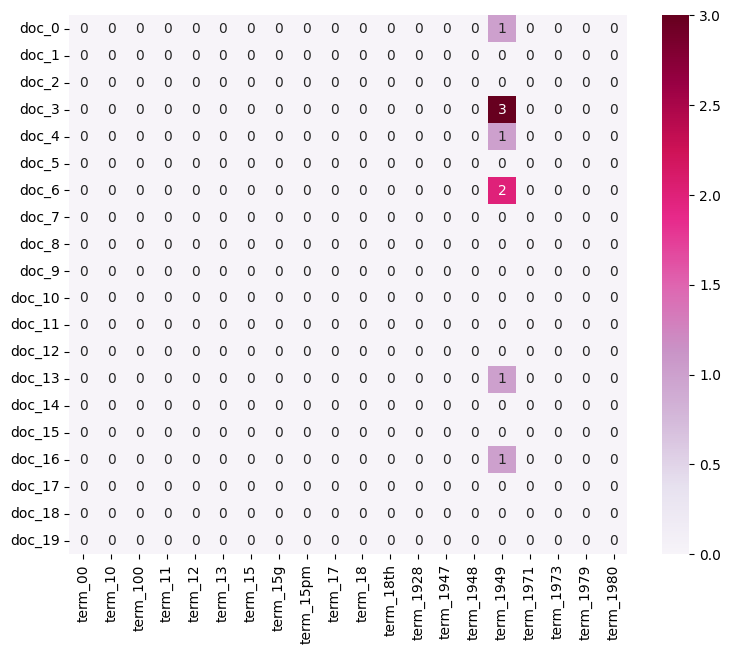

In [174]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
display(df_todraw)

plt.subplots(figsize=(9, 7))

# Create a heatmap using Seaborn with the following properties:
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",  # Color map for the heatmap
                 vmin=0, vmax=3,  # Set the minimum and maximum values for the color scale
                 annot=True)  # Annotate the cells with values


term_10  term_13  term_15  term_15g  term_2mp  term_350  term_375  \
doc_3          0        0        0         0         0         0         0   
doc_14         0        0        0         0         0         0         0   
doc_16         0        0        0         0         0         0         0   
doc_20         0        0        0         0         0         0         0   
doc_21         0        0        0         0         0         0         0   
doc_34         0        0        0         0         0         0         0   
doc_38         0        0        0         0         0         0         0   
doc_40         0        0        0         0         1         0         0   
doc_45         0        0        0         0         0         0         0   
doc_47         0        0        0         0         0         0         0   
doc_52         0        0        0         0         0         0         0   
doc_55         0        0        0         0         0         0         0   
doc_57         0        0        1         0         0         0         0   
doc_58         0        0        0         0         0         0         0   
doc_65         0        0        0         0         0         0         0   
doc_66         0        0        0         0         0         0         0   
doc_76         0        0        0         0         0         0         0   
doc_84         0        0        0         0         0         0         0   
doc_95         0        0        0         0         0         0         0   
doc_96         0        0        0         0         0         0         0   
doc_103        0        0        0         0         0         0         0   
doc_104        0        0        0         0         0         0         1   
doc_105        0        0        0         0         0         0         0   
doc_107        0        0        0         0         0         1         0   
doc_108        0        0        0         0         0         0         0   
doc_114        0        0        0         0         0         0         0   
doc_127        0        0        0         0         0         0         0   
doc_130        0        0        0         0         0         0         0   
doc_131        0        0        0         0         0         0         0   
doc_149        0        0        0         0         0         0         0   
doc_152        0        0        0         0         0         0         0   
doc_160        0        0        0         0         0         0         0   
doc_166        0        0        0         0         0         0         0   
doc_174        0        0        0         0         0         0         0   
doc_177        0        0        0         1         0         0         0   
doc_179        0        0        0         0         0         0         0   
doc_183        0        0        0         0         0         0         0   
doc_184        1        0        0         0         0         0         0   
doc_188        0        1        0         0         0         0         0   

         term_45  term_510  term_680  ...  term_actually  term_advertised  \
doc_3          1         0         0  ...              0                0   
doc_14         0         0         0  ...              0                0   
doc_16         0         0         0  ...              0                0   
doc_20         0         0         0  ...              0                0   
doc_21         0         0         0  ...              0                0   
doc_34         0         0         0  ...              0                0   
doc_38         0         0         1  ...              0                0   
doc_40         0         0         0  ...              0                0   
doc_45         0         0         0  ...              0                0   
doc_47         0         0         0  ...              0                0   
doc_52         0         0         0  ...

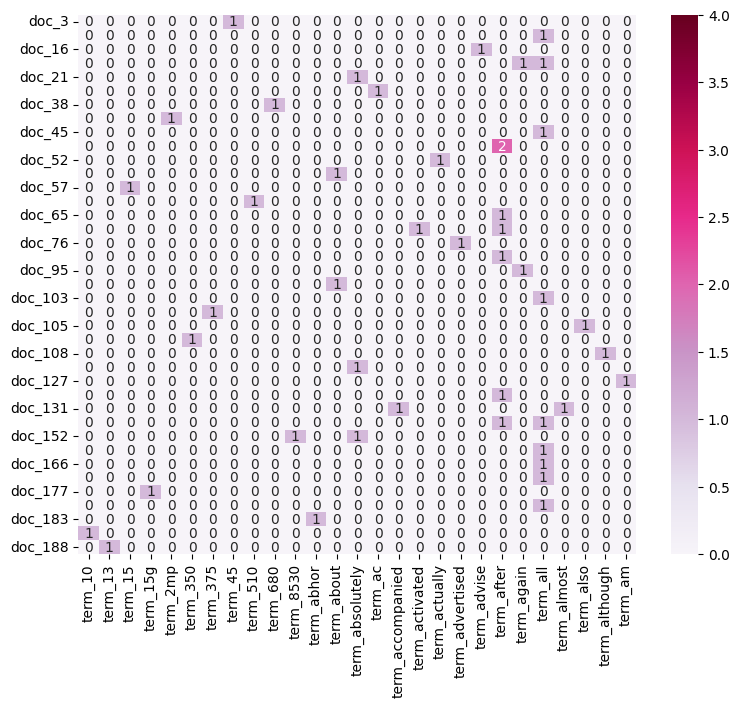

In [175]:
# Filter out rows and columns with all occurrences as zero

plot_z = X_counts[0:200, 0:200].toarray()

# Find non-zero rows and columns using numpy's nonzero function
non_zero_rows, non_zero_cols = np.nonzero(plot_z)
non_zero_cols = np.unique(non_zero_cols)
non_zero_rows = np.unique(non_zero_rows)

plot_x = ["term_" + str(i) for i in count_vect.get_feature_names_out()[0:200]]
plot_y = ["doc_" + str(i) for i in list(X.index)[0:200]]

# Select the rows and columns with non-zero values
selected_x = [plot_x[col] for col in non_zero_cols]
selected_y = [plot_y[row] for row in non_zero_rows]
selected_z = plot_z[non_zero_rows][:, non_zero_cols]

df_todraw = pd.DataFrame(selected_z, columns=selected_x, index=selected_y)
display(df_todraw)

plt.subplots(figsize=(9, 7))

ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=4, annot=True)

#### 4.4 Dimensionality Reduction

In [176]:
from sklearn.decomposition import PCA
print(X_counts.shape)
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
print(X_reduced.shape)

(2981, 5152)
(2981, 2)


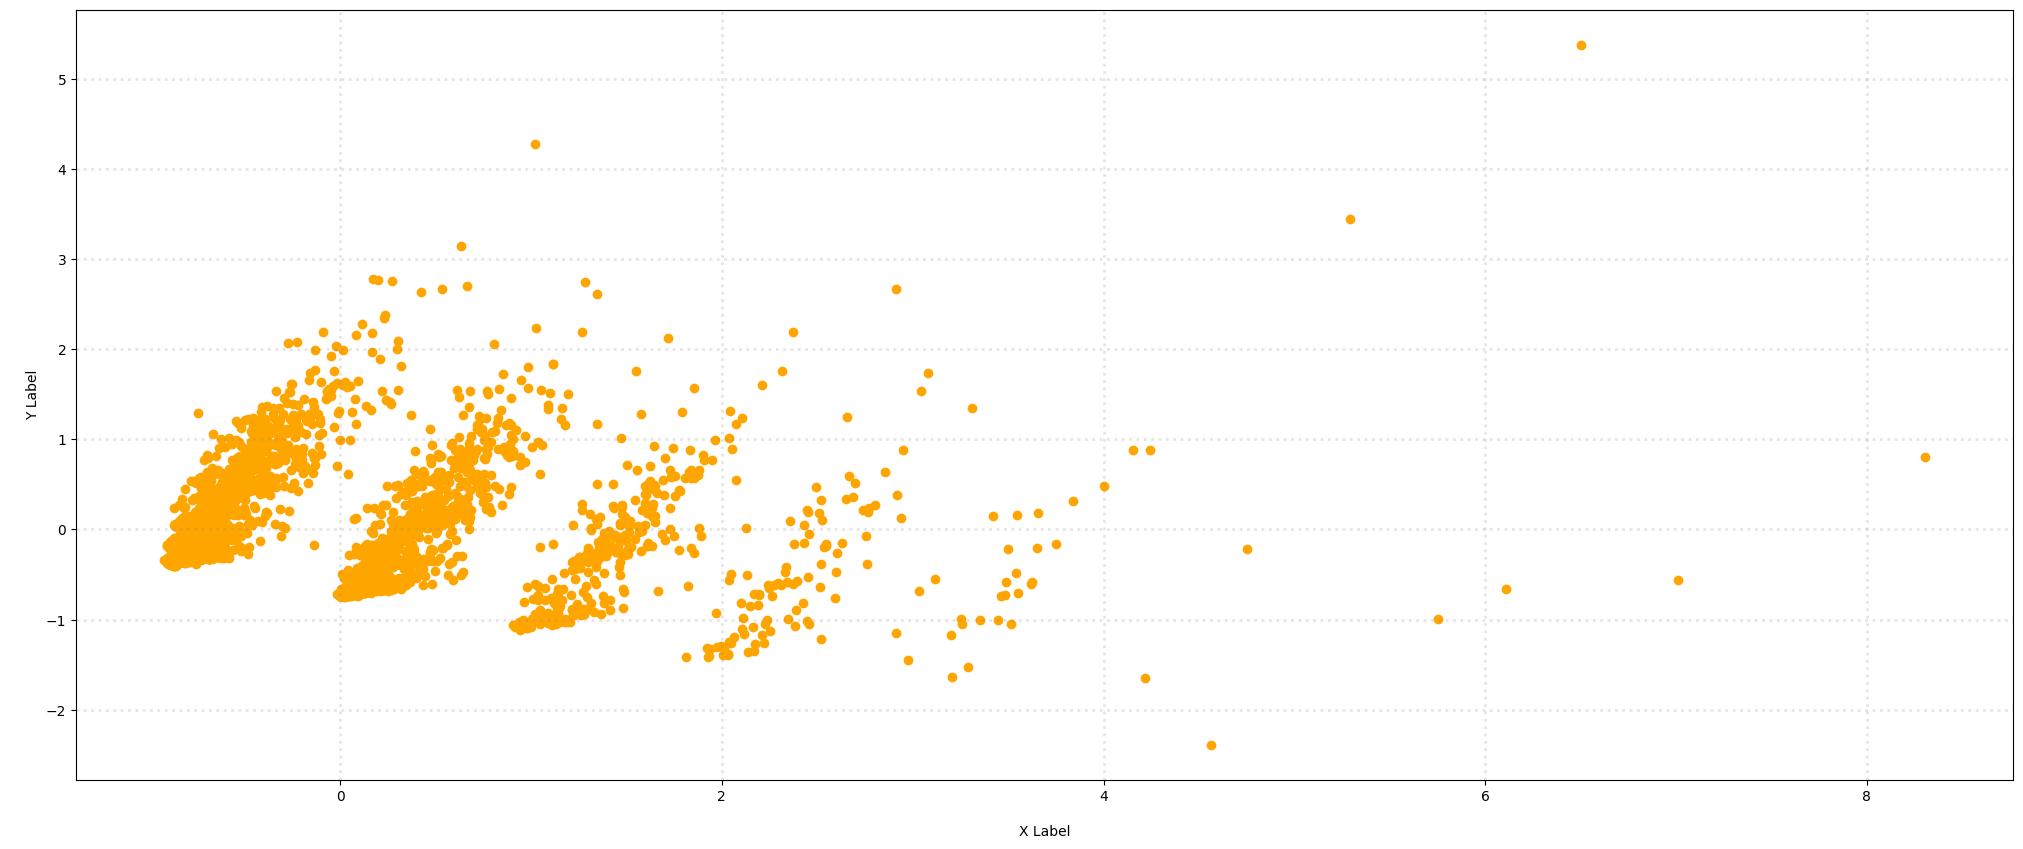

In [177]:
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

xs = X_reduced.T[0]
ys = X_reduced.T[1]
   
ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

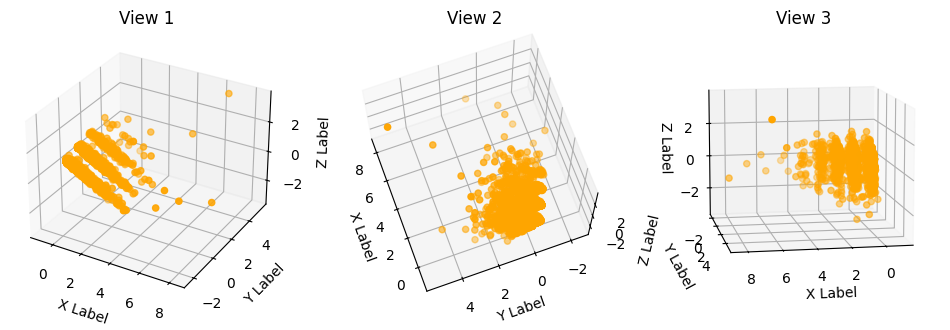

In [178]:
X_reduced_3d = PCA(n_components=3).fit_transform(X_counts.toarray())

from mpl_toolkits.mplot3d import Axes3D  # Import 3D plotting tools

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(131, projection='3d')

xs = X_reduced_3d[:, 0]
ys = X_reduced_3d[:, 1]
zs = X_reduced_3d[:, 2]
# plot 1
ax1.scatter(xs, ys, zs, c=c, marker='o')

ax1.set_title('View 1')
ax1.set_xlabel('X Label')
ax1.set_ylabel('Y Label')
ax1.set_zlabel('Z Label')

# plot 2
ax2 = fig.add_subplot(132, projection='3d')

xs = X_reduced_3d[:, 0]
ys = X_reduced_3d[:, 1]
zs = X_reduced_3d[:, 2]

ax2.scatter(xs, ys, zs, c=c, marker='o')
ax2.view_init(elev=70, azim=160)  # Adjust the view angle

ax2.set_title('View 2')
ax2.set_xlabel('X Label')
ax2.set_ylabel('Y Label')
ax2.set_zlabel('Z Label')

# plot 3
ax3 = fig.add_subplot(133, projection='3d')

xs = X_reduced_3d[:, 0]
ys = X_reduced_3d[:, 1]
zs = X_reduced_3d[:, 2]

ax3.scatter(xs, ys, zs, c=c, marker='o')
ax3.view_init(elev=10, azim=80)  # Adjust the view angle

ax3.set_title('View 3')
ax3.set_xlabel('X Label')
ax3.set_ylabel('Y Label')
ax3.set_zlabel('Z Label')

plt.show()


#### 4.5 Attribute Transformation / Aggregation

In [179]:
term_frequencies = []
print(X_counts.shape)
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

(2981, 5152)


In [180]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[1000]

2

C:\Users\zijun0502\AppData\Local\Temp\ipykernel_25844\3140323867.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


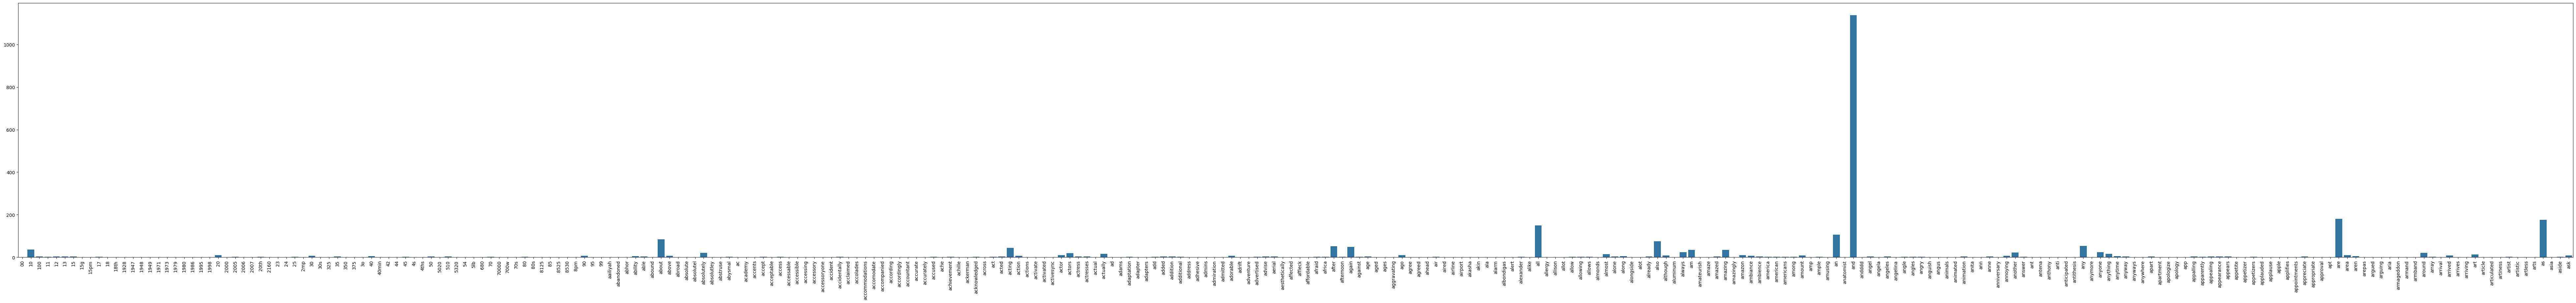

In [181]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

In [182]:
# Import necessary libraries
import plotly.express as px
import pandas as pd

# Prompt the user to input the number of terms to display
display_size = int(input("The size of data to display"))

data = {'Terms': count_vect.get_feature_names_out()[:display_size], 'Term Frequencies': term_frequencies[:display_size]}
df = pd.DataFrame(data)

fig = px.bar(df, x='Terms', y='Term Frequencies', labels={'Term Frequencies': 'Term Frequencies'})
fig.update_xaxes(tickangle=90)
fig.show()


In [183]:
# Answer here
data = {'Terms': count_vect.get_feature_names_out()[:300], 'Term Frequencies': term_frequencies[:300]}
df = pd.DataFrame(data)

# Sort the data in descending order of term frequencies
df = df.sort_values(by='Term Frequencies', ascending=False)

fig = px.bar(df, x='Terms', y='Term Frequencies', labels={'Term Frequencies': 'Term Frequencies'})
fig.update_xaxes(tickangle=90)  # Rotate x-axis labels for better visibility

fig.show()

In [184]:
print(df)

          Terms  Term Frequencies
215         and              1138
272         are               180
296          as               175
178         all               149
213          an               106
..          ...               ...
119    activate                 1
120   activated                 1
121  activesync                 1
126      actual                 1
150     affleck                 1

[300 rows x 2 columns]


C:\Users\zijun0502\AppData\Local\Temp\ipykernel_25844\1525322602.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


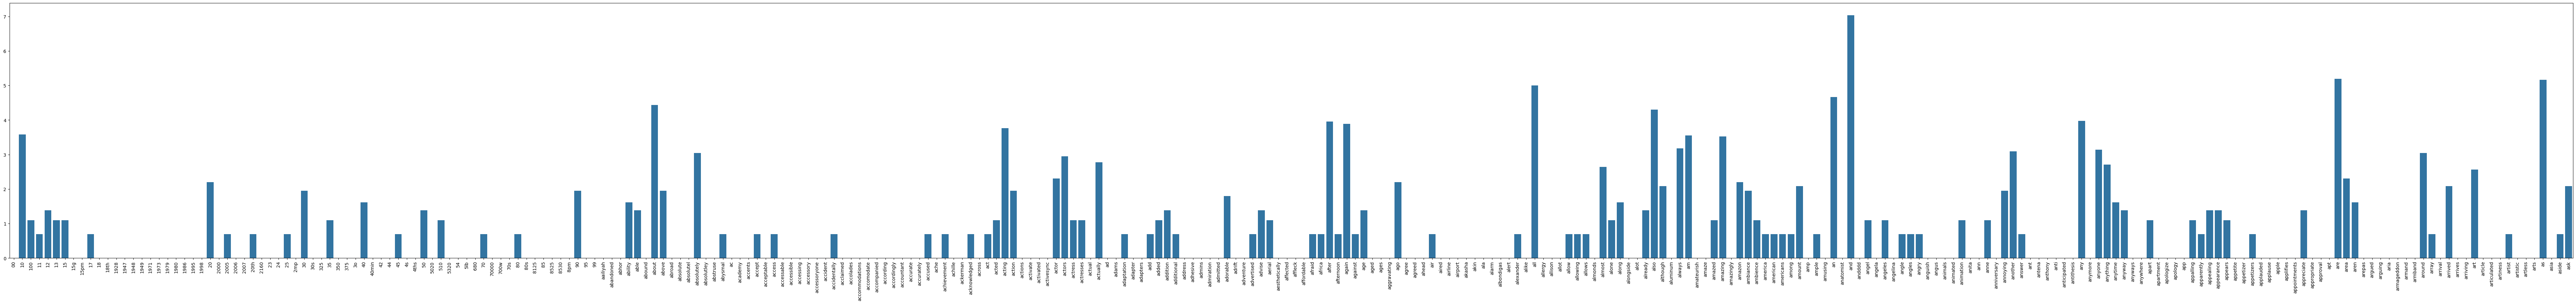

In [185]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

#### 4.6 Discretization and Binarization

In [186]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.text)

LabelBinarizer()

In [187]:
X['bin_text'] = mlb.transform(X['text']).tolist()
X[0:9]

text label  \
0  So there is no way for me to plug it in here i...     0   
1                        Good case, Excellent value.     1   
2                             Great for the jawbone.     1   
3  Tied to charger for conversations lasting more...     0   
4                                  The mic is great.     1   
5  I have to jiggle the plug to get it to line up...     0   
6  If you have several dozen or several hundred c...     0   
7        If you are Razr owner...you must have this!     1   
8                Needless to say, I wasted my money.     0   

                                            unigrams  \
0  [So, there, is, no, way, for, me, to, plug, it...   
1               [Good, case, ,, Excellent, value, .]   
2                      [Great, for, the, jawbone, .]   
3  [Tied, to, charger, for, conversations, lastin...   
4                           [The, mic, is, great, .]   
5  [I, have, to, jiggle, the, plug, to, get, it, ...   
6  [If, you, have, several, dozen, or, several, h...   
7  [If, you, are, Razr, owner, ..., you, must, ha...   
8    [Needless, to, say, ,, I, wasted, my, money, .]   

                                            bin_text  
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
5  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
6  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
7  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
8  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

### 5. Data Exploration

In [188]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[100]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[200]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[300]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [189]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['Integrated seamlessly with the Motorola RAZR phone.']
['The color is even prettier than I thought it would be, and the graphics are incredibly sharp.']
['Now I know that I made a wise decision.']


In [190]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [191]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.178174
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\zijun0502\AppData\Local\Temp\ipykernel_25844\452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\zijun0502\AppData\Local\Temp\ipykernel_25844\452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\zijun0502\AppData\Local\Temp\ipykernel_25844\452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\zijun0502\AppData\Local\Temp\ipykernel_25844\452772485.py:17: DeprecationWarning:

Conversion of an array wit

# Part 3

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).




## 3.1 Visualizations

First, read data and convert it into a pandas DataFrame to facilitate subsequent tasks.

In [192]:
# Initialize an empty string to store the concatenated data
input_data = ''

# Define the directory containing the data files
data_root = './sentiment labelled sentences/'

# List of data file names to be read
data_name = [
    'amazon_cells_labelled.txt',
    'imdb_labelled.txt',
    'yelp_labelled.txt'
]

# Create an empty list to store data for each category (text, label, source)
data = [[], [], []]
col = ['text', 'label', 'source']

for name in data_name:
    # Extract the source from the file name (e.g., 'amazon', 'imdb', 'yelp')
    source = name.split('_')[0]
    
    with open(data_root + name, 'r') as f:
        texts, labels = dmh.format_record(f.read())
    
    data[0] += texts
    data[1] += labels
    data[2] += [source for _ in range(len(texts))]

X = pd.DataFrame()

# Assign the 'text', 'label', and 'source' columns to the DataFrame
X['text'] = data[0]
X['label'] = data[1]
X['source'] = data[2]

# Display the DataFrame
X


text label  source
0     So there is no way for me to plug it in here i...     0  amazon
1                           Good case, Excellent value.     1  amazon
2                                Great for the jawbone.     1  amazon
3     Tied to charger for conversations lasting more...     0  amazon
4                                     The mic is great.     1  amazon
...                                                 ...   ...     ...
2995  I think food should have flavor and texture an...     0    yelp
2996                           Appetite instantly gone.     0    yelp
2997  Overall I was not impressed and would not go b...     0    yelp
2998  The whole experience was underwhelming, and I ...     0    yelp
2999  Then, as if I hadn't wasted enough of my life ...     0    yelp

[3000 rows x 3 columns]

### 3.1.1 Sentiment Distribution by Source

In [193]:
# Group the data in the DataFrame X by 'source' and 'label', and calculate the size of each group
# Unstack the 'label' column to pivot it into columns, making it easier to see the distribution
sentiment_distribution = X.groupby(['source', 'label']).size().unstack('label')
sentiment_distribution

label     0    1
source          
amazon  500  500
imdb    500  500
yelp    500  500

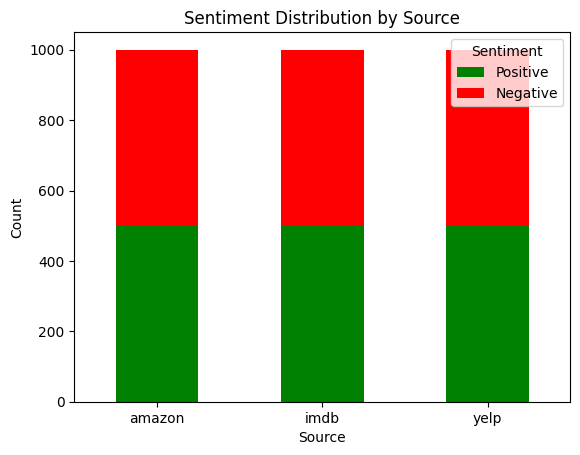

In [194]:
# Plot sentiment distribution as a histogram
colors = ['green', 'red']
sentiment_distribution.plot(kind='bar', stacked=True, color = colors)
plt.title('Sentiment Distribution by Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.legend(title='Sentiment', labels=['Positive', 'Negative'])
plt.show()


We can see that the number of positive and negative comment are equal in this dataset.

### 3.1.2 Wordcloud

A wordcloud serves as a valuable visual representation, enabling us to gain insights into the most frequently used words within a dataset.

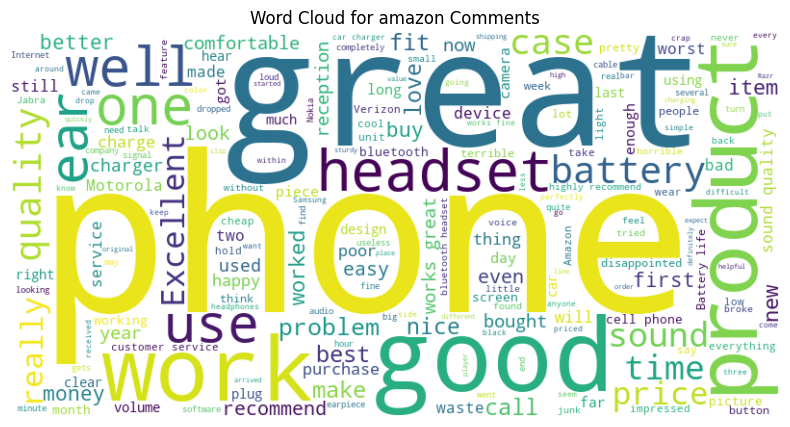

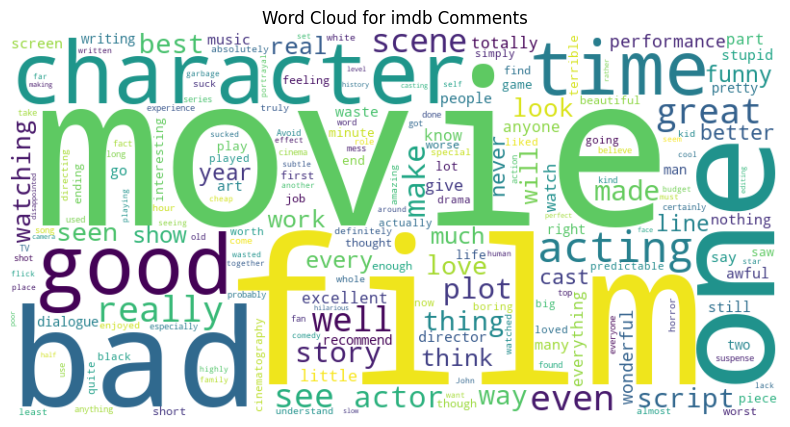

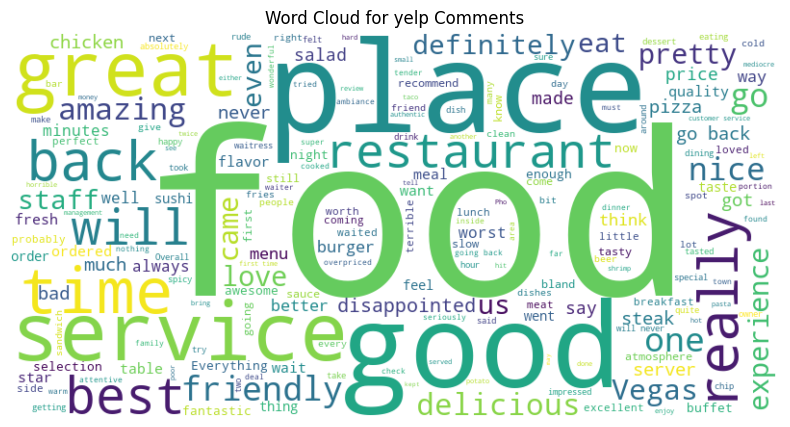

In [195]:
from wordcloud import WordCloud


# Create a dictionary to store comments for each source
comments = {'amazon': [], 'imdb': [], 'yelp': []}

# Loop through the DataFrame and extract comments by source
for source in comments:
    source_comments = X[X['source'] == source]['text'].tolist()
    comments[source].extend(source_comments)

# Generate word clouds for each source
for source in comments:
    comment_text = ' '.join(comments[source])
    
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comment_text)

    # Display the Word Cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {source} Comments')
    plt.axis('off')
    plt.show()


Upon segregating the positive and negative comments and generating separate word clouds for each group, we obtain the following visual representations:

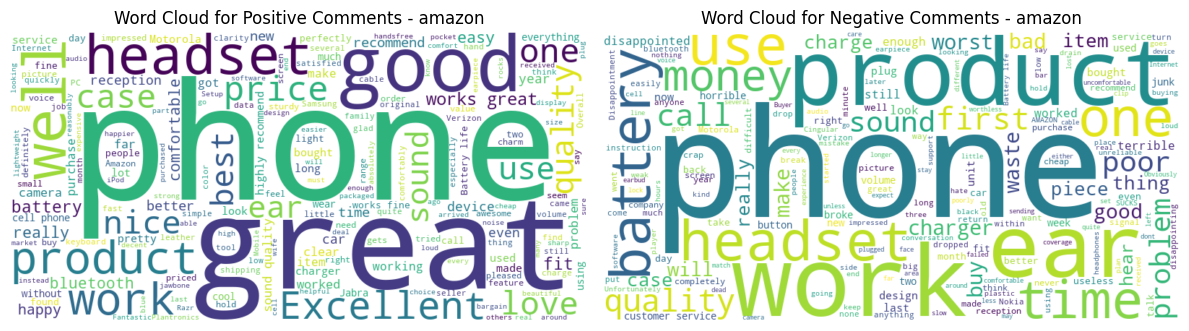

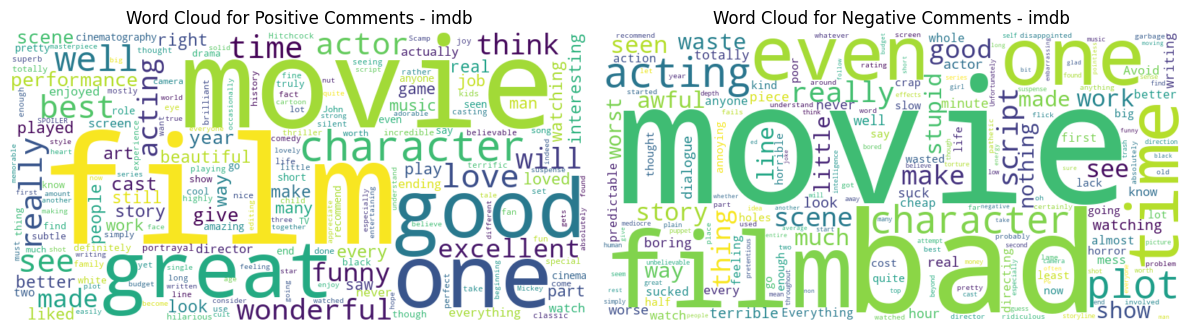

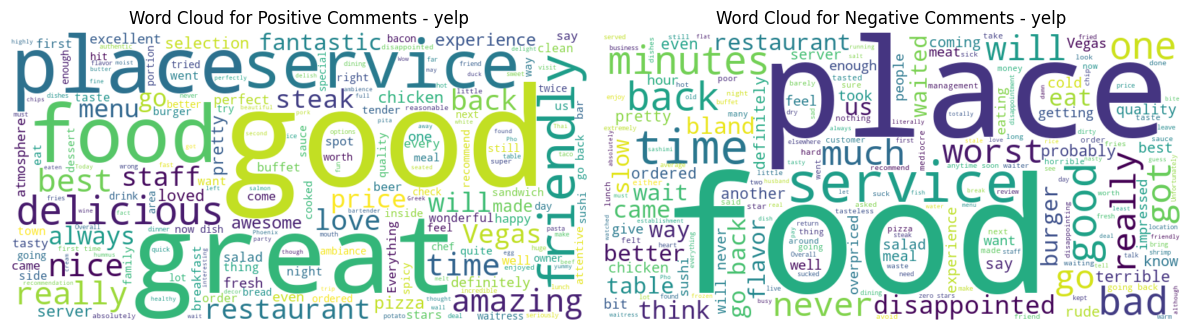

In [196]:
# Separate positive and negative comments for each source
sources = ['amazon', 'imdb', 'yelp']

for source in sources:
    source_positive_comments = X[(X['label'] == '1') & (X['source'] == source)]['text'].tolist()
    source_negative_comments = X[(X['label'] == '0') & (X['source'] == source)]['text'].tolist()

    # Generate word cloud for positive comments of the source
    positive_text = ' '.join(source_positive_comments)
    positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

    # Generate word cloud for negative comments of the source
    negative_text = ' '.join(source_negative_comments)
    negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

    # Create separate subplots for each source
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(positive_wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Positive Comments - {source}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(negative_wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Negative Comments - {source}')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


### 3.1.2 Line Chart of Review Lengths versus Frequency

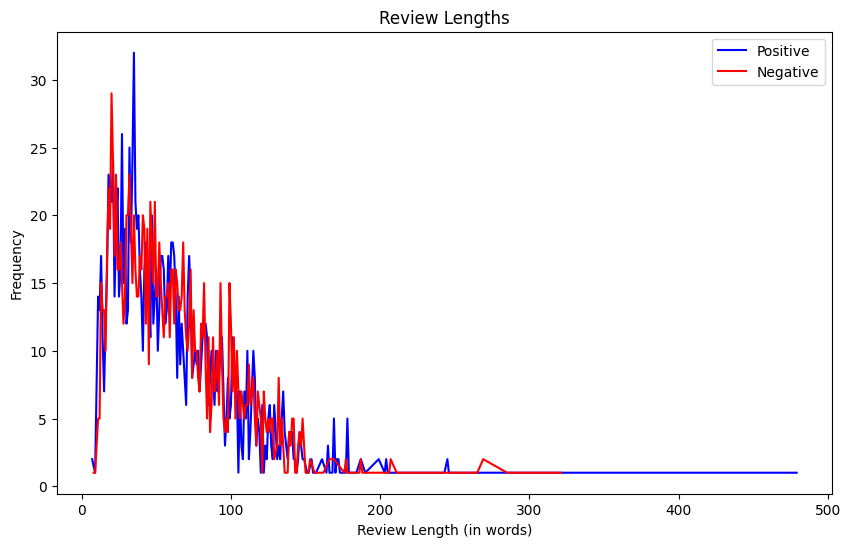

In [197]:
import matplotlib.pyplot as plt

# Calculate review lengths
X['review_length'] = X['text'].apply(len)
# Separate positive and negative comments
positive_lengths = X[X['label'] == '1']['review_length']
negative_lengths = X[X['label'] == '0']['review_length']

# Set the maximum review length for the x-axis
max_length = max(X['review_length'])

# Calculate frequency of review lengths
positive_length_counts = positive_lengths.value_counts().sort_index()
negative_length_counts = negative_lengths.value_counts().sort_index()
# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(positive_length_counts.index, positive_length_counts.values, label='Positive', color='blue')
plt.plot(negative_length_counts.index, negative_length_counts.values, label='Negative', color='red')

# Add labels and title
plt.xlabel('Review Length (in words)')
plt.ylabel('Frequency')
plt.title('Review Lengths')

# Add a legend
plt.legend()

# Show the plot
plt.show()


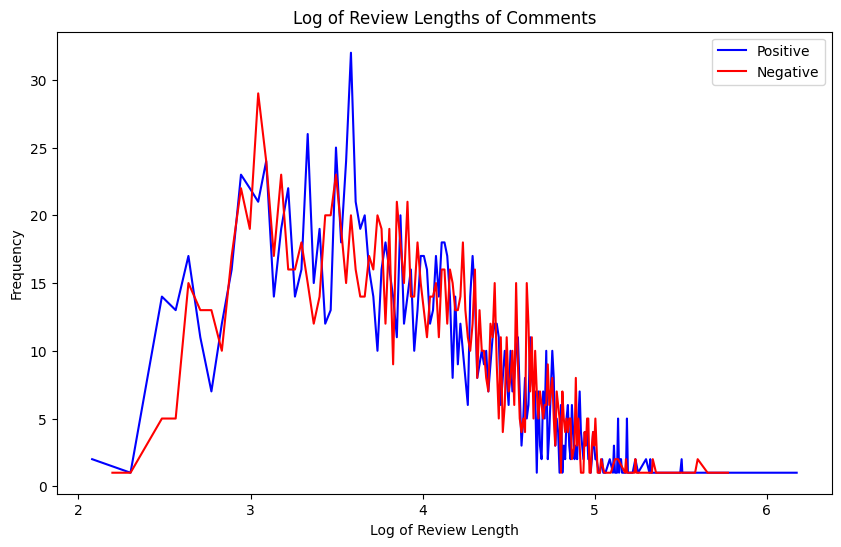

In [198]:
import matplotlib.pyplot as plt

# Calculate review lengths
X['log_review_length'] = X['text'].apply(lambda text: np.log(len(text) + 1))
# Separate positive and negative comments
log_positive_lengths = X[X['label'] == '1']['log_review_length']
log_negative_lengths = X[X['label'] == '0']['log_review_length']

# Set the maximum review length for the x-axis
max_length = max(X['log_review_length'])

# Calculate frequency of review lengths
positive_length_counts = log_positive_lengths.value_counts().sort_index()
negative_length_counts = log_negative_lengths.value_counts().sort_index()
# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(positive_length_counts.index, positive_length_counts.values, label='Positive', color='blue')
plt.plot(negative_length_counts.index, negative_length_counts.values, label='Negative', color='red')

# Add labels and title
plt.xlabel('Log of Review Length')
plt.ylabel('Frequency')
plt.title('Log of Review Lengths of Comments')

# Add a legend
plt.legend()

# Show the plot
plt.show()


It appears that there is little discernible distinction in review length between positive and negative comments.

In [199]:
positive_lengths = X[X['label'] == '1']['review_length'].sort_values()
negative_lengths = X[X['label'] == '0']['review_length'].sort_values()
from sklearn.metrics.pairwise import cosine_similarity
# Calculate the cosine similarity
cosine_sim = cosine_similarity([positive_lengths], [negative_lengths])

# Check the cosine similarity
print(f'Cosine Similarity between positive and negative comment lengths: {cosine_sim[0][0]}')

Cosine Similarity between positive and negative comment lengths: 0.9965311155366963


---

## 3.2 & 3.3 TF-IDF Features and Naive Bayes Classifier

To construct a Naive Bayes Classifier, we first split the dataset into training and testing dataset.

In [200]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X['text'], X['label'], test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(2400,) (600,)


Now, obtain the text token of the training dat

In [201]:
# For TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
# For word frequency
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

In [202]:
from sklearn.naive_bayes import MultinomialNB

# For TF-IDF Classifier
naive_bayes_tfidf = MultinomialNB()
naive_bayes_tfidf.fit(X_train_tfidf, y_train)

# For word frequency Classifier
naive_bayes_count = MultinomialNB()
naive_bayes_count.fit(X_train_count, y_train)

MultinomialNB()

In [203]:
from sklearn.metrics import accuracy_score, classification_report

# Use the TF-IDF classifier (naive_bayes_tfidf) to predict labels for the test data (X_test_tfidf)
y_pred_tfidf = naive_bayes_tfidf.predict(X_test_tfidf)

# Calculate the accuracy of the classifier by comparing predicted labels (y_pred_tfidf) with true labels (y_test)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

# Generate a classification report, which provides various metrics for classification evaluation
report_tfidf = classification_report(y_test, y_pred_tfidf)

print("TF-IDF Classifier - Accuracy:", accuracy_tfidf)
print("TF-IDF Classifier - Classification Report:\n", report_tfidf)


TF-IDF Classifier - Accuracy: 0.8316666666666667
TF-IDF Classifier - Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       299
           1       0.84      0.81      0.83       301

    accuracy                           0.83       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.83      0.83      0.83       600



Same goes for word count classifier

In [204]:
y_pred_count = naive_bayes_count.predict(X_test_count)
accuracy_count = accuracy_score(y_test, y_pred_count)
report_count = classification_report(y_test, y_pred_count)

print("Word Frequency (Count) Classifier - Accuracy:", accuracy_count)
print("Word Frequency (Count) Classifier - Classification Report:\n", report_count)


Word Frequency (Count) Classifier - Accuracy: 0.835
Word Frequency (Count) Classifier - Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       299
           1       0.85      0.81      0.83       301

    accuracy                           0.83       600
   macro avg       0.84      0.84      0.83       600
weighted avg       0.84      0.83      0.83       600



The precision and recall of the Word Frequency (Count) Classifier are slightly better than those of the TF-IDF Classifier. This implies that the Word Frequency Classifier has a slightly higher ability to make precise positive predictions and a slightly higher ability to capture actual positive instances.

# Part 4

#### 1. 5.3 Feature subset selection

In this section, we try to visualize the sparse array, so the way we do it is to turn it into normal array directly as follows.

In [205]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

The document-term matrix is extremely sparse, and it's efficiently stored as a **scipy.sparse.csr_matrix**. This data structure leverages the compressed sparse row (CSR) matrix technique to store only the non-zero elements and their indices. The sparse matrix we obtained in the lab has a sparsity of 99.5%, which means that it's mostly composed of zeros. If we were to convert that matrix to a regular dense array, it would consume approximately 200 times more memory and significantly slow down vector and matrix operations due to the increased size.

To improve this, we can traverse the sparse matrix and create a matrix that only preserve non-zero rows and columns, then plot the heatmap using this matrix. We can also use this sparse matrix to do vector or matrix operation directly to have a better performance.

#### 2. 5.5 Attribute Transformation / Aggregation

The below code computes term frequencies for each term in sparse matrix *X_counts* by iterating over its columns. However, this approach can be highly inefficient when dealing with large and sparse matrices. The improvement technique is the same as the heatmap.

In [ ]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

#### 3. 5.2 Feature Creation

Instead of using a lambda function in ***apply***, it's more efficient and readable to define a separate function for text pre-processing

In [ ]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [ ]:
from nltk.tokenize import word_tokenize

X['unigrams'] = X['text'].apply(word_tokenize)